In [5]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
df = pd.read_csv('customer_complaints_1.csv')

In [7]:
print(df['text'])

0     I used to love Comcast. Until all these consta...
1     I'm so over Comcast! The worst internet provid...
2     If I could give them a negative star or no sta...
3     I've had the worst experiences so far since in...
4     Check your contract when you sign up for Comca...
5     Thank God. I am changing to Dish. They gave me...
6     I Have been a long time customer and only have...
7     There is a malfunction on the DVR manager whic...
8     Charges overwhelming. Comcast service rep was ...
9     I have had cable, DISH, and U-verse, etc. in t...
10    Had them from 2014 to now. I'd tell new custom...
11    Disappointed. I have been a Comcast/Xfinity cu...
12    These people are unethical and disturbing obli...
13    Unplanned, unexpected, all day outages, rude s...
14    BE WARNED. You will have 10$ hidden fees when ...
15    Had Comcast. Overall the terrible experience e...
16    When I called the infinity customer service ce...
17    Outraged, that it should not take a month 

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [9]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [10]:
print(df['cleaned_text'] )

0     used love comcast constant update internet cab...
1     im comcast worst internet provider im taking o...
2     could give negative star star review would nev...
3     ive worst experience far since install nothing...
4     check contract sign comcast advertised offer m...
5     thank god changing dish gave awesome pricing s...
6     long time customer xfinity isp local walmart n...
7     malfunction dvr manager preventing u adding re...
8     charge overwhelming comcast service rep ignora...
9     cable dish uverse etc past eh know comcast tak...
10    id tell new customer run nowhere run tried tur...
11    disappointed comcastxfinity customer almost tw...
12    people unethical disturbing oblivious customer...
13    unplanned unexpected day outage rude service r...
14    warned hidden fee sign service charge extra lo...
15    comcast overall terrible experience everyone e...
16    called infinity customer service center compla...
17    outraged take month get internet service c

In [11]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

In [12]:
# Define the number of clusters
k = 3

In [13]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [15]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['cleaned_text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [16]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 to
 me
 although
 super
 actually
 excited
 promises
 promised
 pricing
 gave

Cluster 1:
 to
 the
 service
 my
 on
 was
 is
 rude
 that
 customer

Cluster 2:
 the
 and
 to
 for
 it
 you
 they
 that
 is
 have



In [17]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.631578947368421


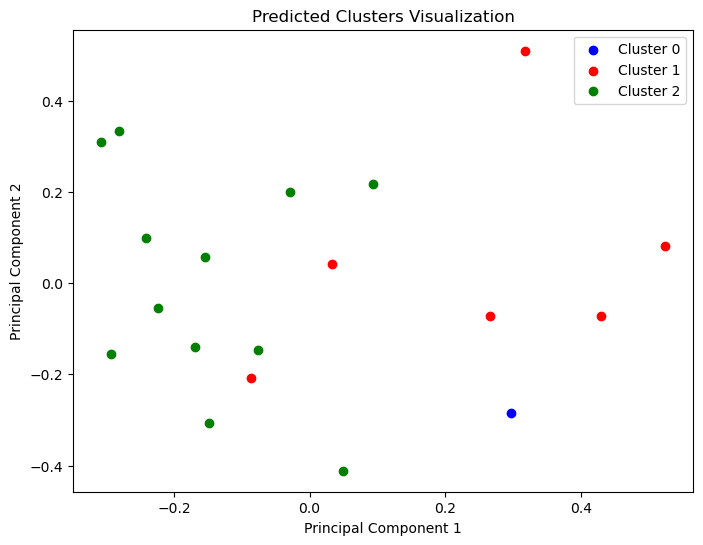

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()